In [7]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# Import files and Generate plot data
plotdata_1 = pd.read_csv('PPO/data/Whitebox/PPO-perturbation-effects-LunarLander.csv', index_col=0)
plotdata_2 = pd.read_csv('PPO/data/Blackbox/PPO-perturbation-effects-LunarLander.csv', index_col=0)
plotdata_3 = pd.read_csv('PPO/data/Noise/PPO-perturbation-effects-LunarLander.csv', index_col=0)
plotdata_4 = pd.read_csv('Soft-Actor-Critic/data/Whitebox/SAC-perturbation-effects-LunarLander.csv', index_col=0)

eps = plotdata_1["Epsilon"]
PPO_WB_reward = plotdata_1["mean_reward"]
PPO_WB_std = plotdata_1["std_reward"]

PPO_BB_reward = plotdata_2["mean_reward"]
PPO_BB_std = plotdata_2["std_reward"]

PPO_GN_reward = plotdata_3["mean_reward"]
PPO_GN_std = plotdata_3["std_reward"]

SAC_reward = plotdata_4["SAC"]

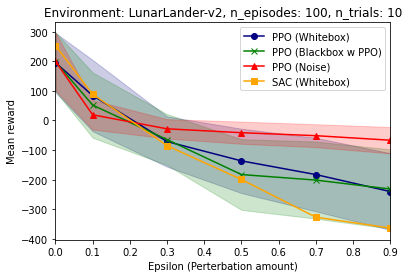

In [30]:
plt.figure()

plt.title("Environment: LunarLander-v2, n_episodes: 100, n_trials: 10", )
plt.xlabel("Epsilon (Perterbation amount)")
plt.ylabel("Mean reward")
plt.xlim([0,0.9])

color = 'navy'
plt.plot(eps, PPO_WB_reward, label='PPO (Whitebox)', marker='o', color=color)
plt.fill_between(eps, PPO_WB_reward+PPO_WB_std, PPO_WB_reward-PPO_WB_std, alpha=0.2, color=color)

color = 'green'
plt.plot(eps, PPO_BB_reward, label='PPO (Blackbox w PPO)', marker='x', color=color)
plt.fill_between(eps, PPO_BB_reward+PPO_BB_std, PPO_BB_reward-PPO_BB_std, alpha=0.2, color=color)

color = 'red'
plt.plot(eps, PPO_GN_reward, label='PPO (Noise)', marker='^', color=color)
plt.fill_between(eps, PPO_GN_reward+PPO_GN_std, PPO_GN_reward-PPO_GN_std, alpha=0.2, color=color)

color = 'orange'
plt.plot(eps, SAC_reward, label='SAC (Whitebox)', marker='s', color=color)
# plt.fill_between(eps, PPO_WB_reward+PPO_WB_std, PPO_WB_reward-PPO_WB_std, alpha=0.3, color=color)

plt.legend(loc='upper right')

plt.savefig('LunarLander-epsilonVSMeanReward')
plt.show()